# Experimentation

This notebook's purpose is to easily experiment some chunks of code. There will be nothing here that actually works. The main purpose is to show my idea walkthourgs. When time passes I am expecting to copy-paste the working code from here to original .py script files.

## Read screen from a web page experiments
(https://github.com/hakanonal/geodashml/projects/1#card-37027228)

26.04.2020 - I have initally googled and bumped into [this](https://stackoverflow.com/questions/38568804/python-open-html-file-take-screenshot-crop-and-save-as-image) and [this](https://stackoverflow.com/questions/38568804/python-open-html-file-take-screenshot-crop-and-save-as-image). 

- Some fooling around with these ideas. 
- it appears that selenium is the right tool to get the screen shot. I still not sure if the scracth version of the game is going to provide the continoues images during playing the game. After all I do not have any idea what the game's runtime. we need to test more if we can get screenshots in a loop so that we can get series of screenshot images to feed into the network.
- I have bumped into selenium installation problem, currentlly trying to resolve, "Message: 'Google\ Chrome.app' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home" error message 
- This [page](https://www.selenium.dev/documentation/en/webdriver/driver_requirements/) seems to be helped a lot. It is the official selenium documentaion page that explains working principle and driver installation. It also re-directs to google's own [page](https://sites.google.com/a/chromium.org/chromedriver/downloads) to download the driver. I have matched my installed chrome application version with the driver version. I have also needed my mac security setting to allow un-trusted code to execute. I have moved it to /usr/local/bin folder. I choose to trust [this](https://sites.google.com/a/chromium.org/chromedriver/home) guys. Consider [security](https://sites.google.com/a/chromium.org/chromedriver/security-considerations) also.

In [15]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument('headless')
driver = webdriver.Chrome(executable_path="/usr/local/bin/chromedriver", chrome_options=options)

driver.get('https://scratch.mit.edu/projects/105500895/fullscreen/')
image = driver.find_element_by_id('view').screenshot_as_png

- selenium seems to be working. Now we need if we can get the image that we want. It seems not. It is not rendered properlly.

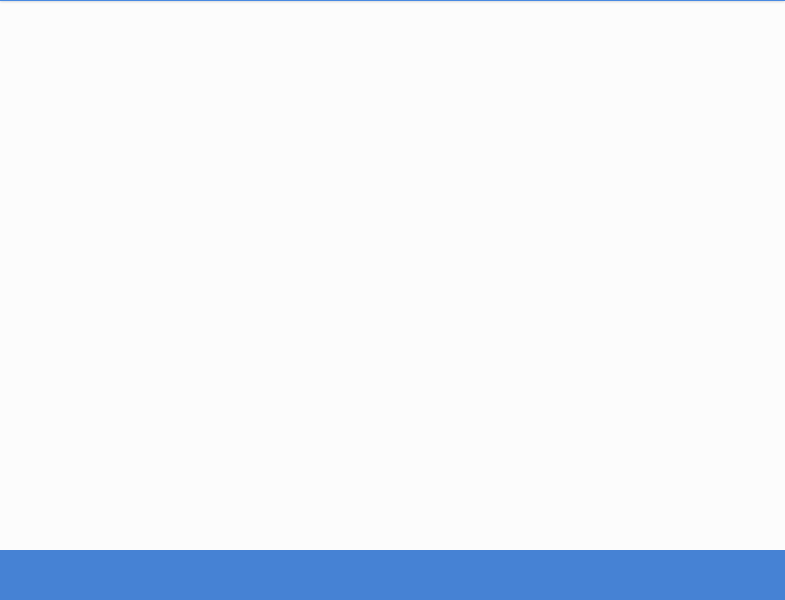

In [18]:
from IPython.display import Image
Image(image)

27.04.2020 - Continue to explore selenium api
- after a blank page I will try different elements to visualize, there may be problem with the flash or html5 or javascript (non-static) elements.
- started to read selenium [webdriver documantation](https://www.selenium.dev/documentation/en/webdriver/waits/) in detail. "Waits" section seems to be promissing
- using the WebDriverWait api has solved the problem.
- waiting is solved the problem but it works inconsistantly. after wating I may need to call find_element function second time. I am planing to fool arround with this code more.
- driver.quit() call seems to be important, otherwise the application stays open. so I have put it into try: finally block. to execute every time.
- trying to understand which element to wait for specificlly this project
- to watch the progress we can get rid of "options.add_argument('headless')" statement so a new window will open
- so after fittling around a little bit more, I have finnally clicked the green flag element an get to the main menu, now I plan to start game and get the updated series images in a loop.
- I am trying to find the right element to start the game by clicking. can not find where to click
- I have founded the element that I have trying to find using find_element**s**_by_css_selector which returns a list. however find_element_by_css_selector this version brings only one element.
- The selenium api is working perfectlly fine. My problem is in scratch. Normally user clicks on the head of the level name or even pressing space is enough, however I can not which element is actually catching that key stroke. I need to find a way to debug the scratch anc find the element that catches the key presses.
- In scratch all visible game elements are in a single element tag named as canvas. I have tried to press space all the parent elements of the canvas however I always get the following error message "Message: element not interactable"
- IS it possible to overcome this problem by getting the root docuement try to send the key command? Checking more on selenium documents. Yes it did work. find element by tag and the tag name is "html" Yeah!
- Now I can consantrate on getting series of images and series of sending keys...
- Just to see if it is working I have waited 1 second and take 3 different snapshots. You can see that our fellow moved forward on the last image.

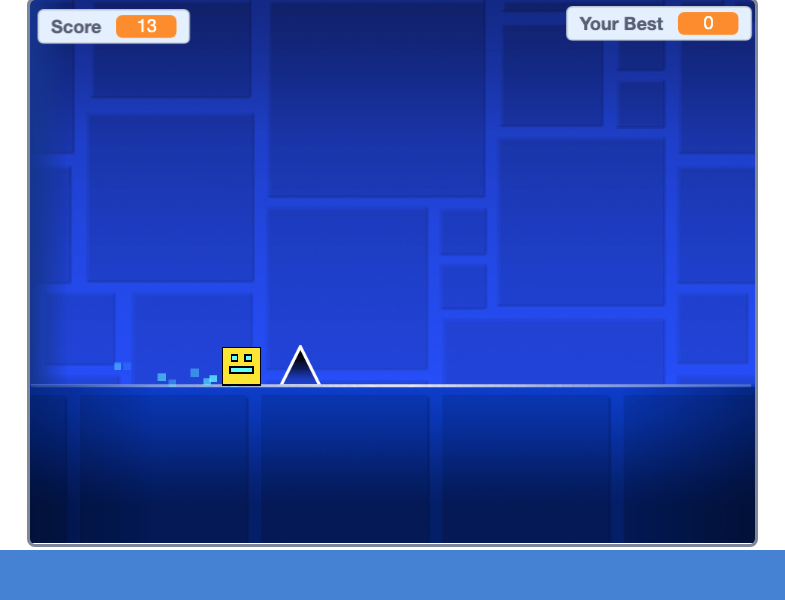

In [93]:
from selenium import webdriver
from IPython.display import Image
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys

options = webdriver.ChromeOptions()
options.add_argument('headless')
driver = webdriver.Chrome(executable_path="/usr/local/bin/chromedriver", chrome_options=options)

try:
    driver.get('https://scratch.mit.edu/projects/105500895/fullscreen/')
    wait = WebDriverWait(driver,timeout=10)
    wait.until(lambda d: d.find_element_by_css_selector(".stage_green-flag-overlay_gNXnv img")) #wait until green flag appears

    flag_element = driver.find_element_by_css_selector(".stage_green-flag-overlay_gNXnv img")
    flag_element.click()

    wait.until(lambda d: d.find_element_by_css_selector(".monitor_monitor-container_2J9gl")) #wait until score board appears

    driver.implicitly_wait(10)
    html = driver.find_element_by_tag_name("html")
    html.send_keys(Keys.SPACE)
    wait.until(lambda d: d.find_element_by_css_selector(".monitor_value_3Yexa")) #wait until score monitor element appears. 

    image0 = driver.find_element_by_css_selector("#view").screenshot_as_png
    driver.implicitly_wait(1)
    image1 = driver.find_element_by_css_selector("#view").screenshot_as_png
    driver.implicitly_wait(1)
    image2 = driver.find_element_by_css_selector("#view").screenshot_as_png
    driver.implicitly_wait(1)


finally:
    #print("ok")
    driver.quit()

Image(image0)
Image(image1)
Image(image2)